# Dot plot for all DEGs from COMMOT

In [5]:
# Imports
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import math
import scanpy as sc
import tqdm

In [6]:
DATA_PATH='/home/felix/projects/facial/felix/data/reprocessed_data/'
PLOT_PATH="/home/felix/projects/facial/felix/plots/reprocessed"

In [7]:
db="secreted_signaling"

In [8]:
samples = ["A02993E1",
           "A02989E1",
           "A02994D6",
           "A02994E6",
           "C01939A4",
           "C01939A5",
           "C01939A6",
           "C01939B2", 
          ]

In [6]:
def get_db_info(pathway, interaction, cofactor):
    # Get interactions
    receptors = list(interaction[interaction.pathway_name==pathway].receptor)
    # Get cofactors
    for id_ in cofactor.index:
        id_
        if pathway in id_:
            break
    cofactors = [x for x in list(cofactor.loc[id_]) if x != ""]
    return receptors, cofactors

In [7]:
def dotplot_significance_and_strength(r_df, title, save_as=False,return_=False):
    # Remove all empty or NaN
    all_genes = list(r_df.index)
    for pathway, row in r_df.items():
        for gene in list(row.index):
            if isinstance(row[gene], dict): # If dict
                if bool(row[gene]):  # If not empty
                    if gene in all_genes:
                        all_genes.remove(gene)
    r_df = r_df[~r_df.index.isin(all_genes)]

    pathways=[]
    genes=[]
    significances=[]
    strengths=[]


    for pathway, row in r_df.items():
        for gene in list(row.index):
            pathways.append(pathway)
            genes.append(gene)

            if isinstance(row[gene], dict):
                if bool(row[gene]):  
                    significances.append(row[gene]["significance"])
                    strengths.append(row[gene]["strength"])
                else:  # Empty dict
                    significances.append(1)
                    strengths.append(0)
            else:  # Not a dict
                significances.append(1)
                strengths.append(0)

    # Create a DataFrame
        df = pd.DataFrame({
            'Pathways': pathways,
            'genes': genes,
            'Significance': significances,
            'Strength': strengths
        })

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 13))

    scale = 40

    df['Significance_capped'] = df['Significance'].clip(lower=1e-10)  # Cap minimum p-value
    scatter = ax.scatter(df['Pathways'], df['genes'], 
                         s=-np.log10(df['Significance_capped']) * scale,  
                         c=df["Strength"],
                         cmap='coolwarm',
                         alpha=0.7,
                         zorder=3
                        )

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.5, zorder=1)
    ax.set_axisbelow(True)  # Put grid behind the dots

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label(f"Strength", rotation=270, labelpad=15)

    # Customize the plot
    plt.title(title, pad=20)
    plt.xticks(rotation=45, ha='right')

    # Add legend
    legend_sizes = [0.05, 0.001, 0.00001]
    #legend_sizes = [max(significances), 0.05, min(significances)]


    legend_points = []
    for sig in legend_sizes:
        size = -np.log10(sig) * scale  # Use same scale as actual plot
        legend_points.append(ax.scatter([], [], s=size, c='gray', alpha=0.7, 
                                        edgecolors='black', linewidth=1.5))
    legend_labels = ['p = 0.05', 'p = 0.001', 'p = 1e-5']
    ax.legend(legend_points, legend_labels, 
              scatterpoints=1, 
              title='Significance', 
              frameon=True,
              loc='upper left',
              bbox_to_anchor=(1.2, 1),
              fontsize=10)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    #plt.show()
    if bool(save_as):
        plt.savefig(save_as)
    if return_:
        return df

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

def cluster_df(df,index, columns, values):
    data_matrix = df.pivot_table(index=index, columns=columns, values=values,fill_value=0)

    # Perform hierarchical clustering
    row_linkage = linkage(pdist(data_matrix, metric='euclidean'), method='ward')
    col_linkage = linkage(pdist(data_matrix.T, metric='euclidean'), method='ward')

    # Get the order from clustering
    from scipy.cluster.hierarchy import leaves_list
    row_order = leaves_list(row_linkage)
    col_order = leaves_list(col_linkage)

    # Reorder the matrix
    clustered_data = data_matrix.iloc[row_order, col_order]

    order = []
    for gene in clustered_data.columns:
        pathways = clustered_data[clustered_data[gene] != 0].index.tolist()
        for pathway in pathways:
            subset = df[df.Pathways==pathway]
            id_ = subset[subset.genes==gene].index.item()
            order.append(id_)

    df = df.loc[order]

    return df

A02993E1


100%|██████████| 22/22 [00:00<00:00, 342.36it/s]


BMP A02993E1
NT A02993E1
CXCL A02993E1
MIF A02993E1
VISFATIN A02993E1
TGFb A02993E1
ACTIVIN A02993E1
EDN A02993E1
GAS A02993E1
ANGPTL A02993E1
VEGF A02993E1
GRN A02993E1
GDF A02993E1
    Skipping SPP1
    Skipping PERIOSTIN
Nr pathways: 7
SEMA3
IGF
NRG
PTN
ncWNT
MK
PDGF
Nr pathways: 6
A02989E1


100%|██████████| 22/22 [00:01<00:00, 13.04it/s]


Nr pathways: 22
MK
PTN
EDN
NT
GAS
VISFATIN
ncWNT
SPP1
TGFb
ANGPTL
NRG
IGF
BMP
SEMA3
PDGF
CXCL
MIF
ACTIVIN
VEGF
Nr pathways: 19
    Old  Strength:15.886193077543526, Significance:0.003175739880465267
    New  Strength:427.48372120125475, Significance:0.0
    Replaced PTN:NNAT
    Old  Strength:75.63828166191693, Significance:1.4432899320127035e-15
    New  Strength:487.2547361935376, Significance:0.0
    Replaced PTN:COL3A1
A02994D6


100%|██████████| 22/22 [00:02<00:00,  8.72it/s]


Nr pathways: 22
PTN
EDN
NT
VISFATIN
SPP1
MK
PDGF
ANGPTL
NRG
MIF
ncWNT
TGFb
CXCL
VEGF
IGF
SEMA3
GAS
GDF
PERIOSTIN
BMP
Nr pathways: 19
    Old  Strength:21.415521578976726, Significance:0.0002619102023064812
    New  Strength:115.70170519845263, Significance:0.0
    Replaced PTN:ERBB3
    Old  Strength:11.365992264037486, Significance:0.02274455001034348
    New  Strength:15.189115147604412, Significance:0.0043246312120407415
    Replaced SPP1:PLXND1
    Old  Strength:12.929209753768353, Significance:0.0116269177033691
    New  Strength:18.49002794108576, Significance:0.000989587047881324
    Replaced VEGF:PLXND1
    Old  Strength:13.106172948881252, Significance:0.010768498741418608
    New  Strength:27.449019621393255, Significance:1.6127311264657607e-05
    Replaced MK:ACKR3
    Old  Strength:42.34084064536935, Significance:1.4176766982565425e-08
    New  Strength:75.93906189447146, Significance:1.2212453270876722e-15
    Replaced PTN:EDNRA
    Old  Strength:166.56534028569308, Signif

100%|██████████| 22/22 [00:00<00:00, 412.71it/s]


NT A02994E6
CXCL A02994E6
MIF A02994E6
VISFATIN A02994E6
TGFb A02994E6
ACTIVIN A02994E6
EDN A02994E6
GAS A02994E6
ANGPTL A02994E6
VEGF A02994E6
GRN A02994E6
GDF A02994E6
SPP1 A02994E6
PERIOSTIN A02994E6
Nr pathways: 8
SEMA3
PTN
MK
ncWNT
PDGF
BMP
NRG
Nr pathways: 7
C01939A4


100%|██████████| 22/22 [00:00<00:00, 79.37it/s]


NRG C01939A4
ncWNT C01939A4
NT C01939A4
CXCL C01939A4
MIF C01939A4
VISFATIN C01939A4
TGFb C01939A4
ACTIVIN C01939A4
EDN C01939A4
GAS C01939A4
ANGPTL C01939A4
VEGF C01939A4
GRN C01939A4
GDF C01939A4
Nr pathways: 8
IGF
SPP1
PTN
BMP
MK
SEMA3
PDGF
Nr pathways: 7
    Old  Strength:163.5035959014545, Significance:0.0
    New  Strength:176.0050861057959, Significance:0.0
    Replaced PTN:ANXA2
    Old  Strength:10.651587367672171, Significance:0.030771751360197608
    New  Strength:40.09743017579491, Significance:4.1321802535243535e-08
    Replaced SEMA3:NNAT
    Old  Strength:13.52005018217158, Significance:0.00899542176808732
    New  Strength:33.51924390662221, Significance:9.350231932048203e-07
    Replaced PTN:VGLL3
C01939A5


100%|██████████| 22/22 [00:00<00:00, 60.06it/s]


NT C01939A5
CXCL C01939A5
MIF C01939A5
VISFATIN C01939A5
TGFb C01939A5
ACTIVIN C01939A5
EDN C01939A5
GAS C01939A5
ANGPTL C01939A5
VEGF C01939A5
GRN C01939A5
GDF C01939A5
Nr pathways: 10
IGF
PTN
MK
ncWNT
PDGF
NRG
SPP1
SEMA3
BMP
PERIOSTIN
Nr pathways: 10
    Old  Strength:25.840292791950137, Significance:3.407968073432244e-05
    New  Strength:84.06964720190709, Significance:0.0
    Replaced PTN:MARCKS
    Old  Strength:28.518422499251457, Significance:9.791186511010075e-06
    New  Strength:34.81638426979324, Significance:5.066748580695446e-07
    Replaced IGF:MEST
    Old  Strength:26.776597200931402, Significance:2.205693878587489e-05
    New  Strength:30.820829382752297, Significance:3.3301323302259433e-06
    Replaced SEMA3:NRP2
C01939A6


100%|██████████| 22/22 [00:00<00:00, 36.36it/s]


NT C01939A6
CXCL C01939A6
MIF C01939A6
VISFATIN C01939A6
    Skipping TGFb
ACTIVIN C01939A6
EDN C01939A6
GAS C01939A6
ANGPTL C01939A6
VEGF C01939A6
GRN C01939A6
GDF C01939A6
SPP1 C01939A6
Nr pathways: 9
IGF
BMP
MK
ncWNT
NRG
PTN
PDGF
SEMA3
PERIOSTIN
Nr pathways: 9
    Old  Strength:45.114054730514646, Significance:3.764679235018775e-09
    New  Strength:138.14996515715055, Significance:0.0
    Replaced ncWNT:COL3A1
    Old  Strength:39.90780513149878, Significance:4.5226725364777565e-08
    New  Strength:63.62237429130007, Significance:5.019318294330333e-13
    Replaced IGF:COL3A1
    Old  Strength:78.63320558787586, Significance:3.3306690738754696e-16
    New  Strength:111.92832650242427, Significance:0.0
    Replaced ncWNT:COL1A2
    Old  Strength:9.856526008517042, Significance:0.042915090679637946
    New  Strength:20.827219068588416, Significance:0.0003426493036678968
    Replaced ncWNT:MARCKS
    Old  Strength:38.07211237516801, Significance:1.0828245200489306e-07
    New  Strengt

100%|██████████| 22/22 [00:00<00:00, 108.78it/s]


NT C01939B2
CXCL C01939B2
MIF C01939B2
VISFATIN C01939B2
TGFb C01939B2
ACTIVIN C01939B2
EDN C01939B2
GAS C01939B2
ANGPTL C01939B2
VEGF C01939B2
GRN C01939B2
GDF C01939B2
SPP1 C01939B2
Nr pathways: 9
IGF
PDGF
BMP
SEMA3
PERIOSTIN
PTN
MK
NRG
Nr pathways: 7
    Old  Strength:11.294256731720482, Significance:0.023448624813938723
    New  Strength:26.265340077837067, Significance:2.7975514915623556e-05
    Replaced PTN:ROBO2
    Old  Strength:11.13984582068258, Significance:0.02503649267377739
    New  Strength:45.961585250060764, Significance:2.5086039912025626e-09
    Replaced PTN:SLC2A1
    Old  Strength:24.43863266468188, Significance:6.522699024325007e-05
    New  Strength:42.26017384731809, Significance:1.4733399611444042e-08
    Replaced PDGF:POSTN
    Old  Strength:38.00117531607675, Significance:1.1199338811884729e-07
    New  Strength:56.10762292804022, Significance:1.903655011403771e-11
    Replaced PDGF:NCAM2
    Old  Strength:11.149546675021714, Significance:0.024933743471244774

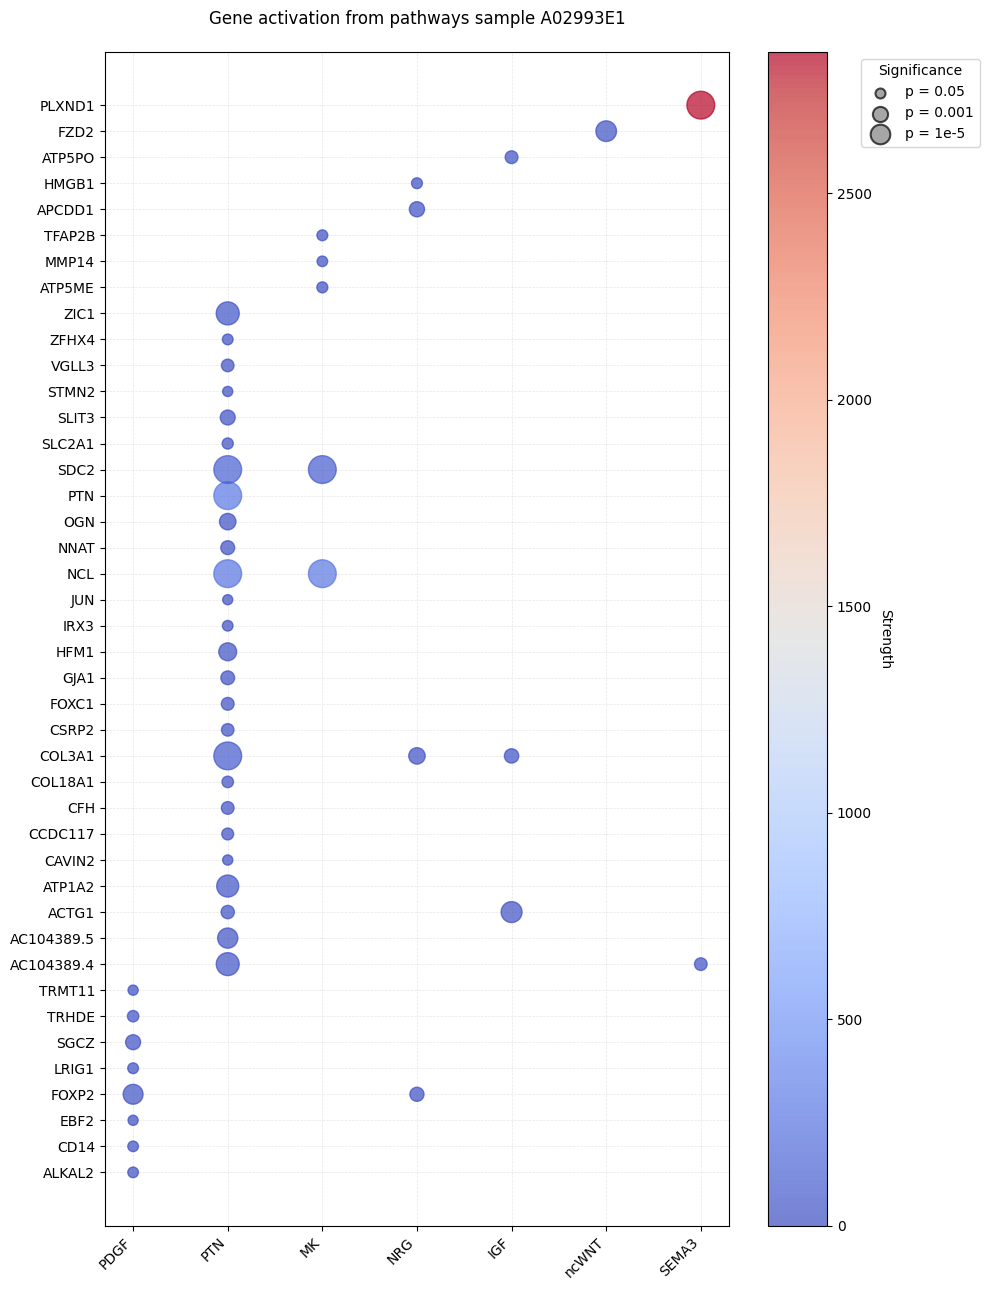

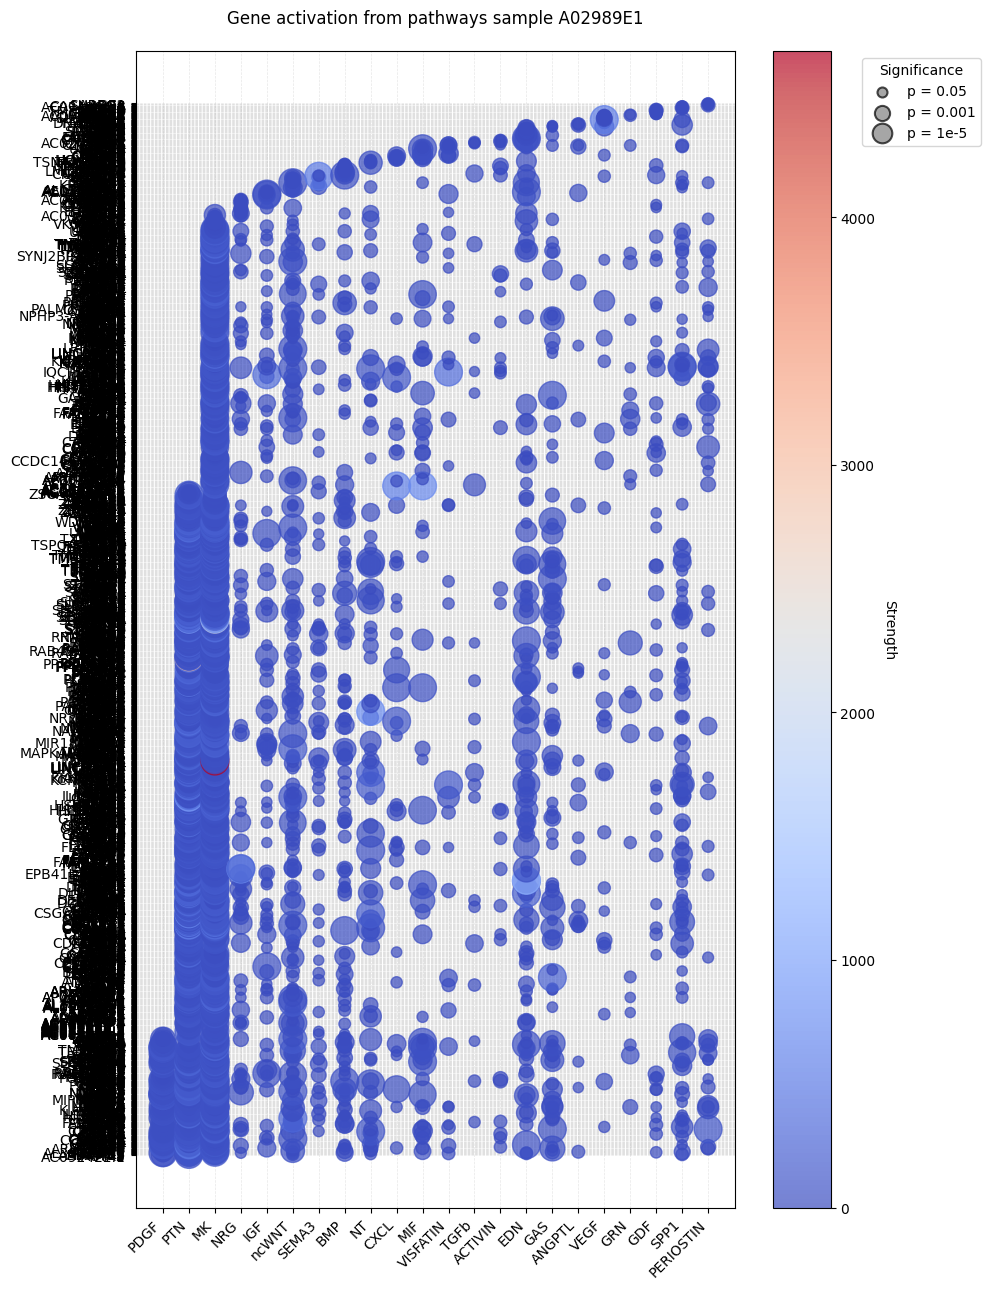

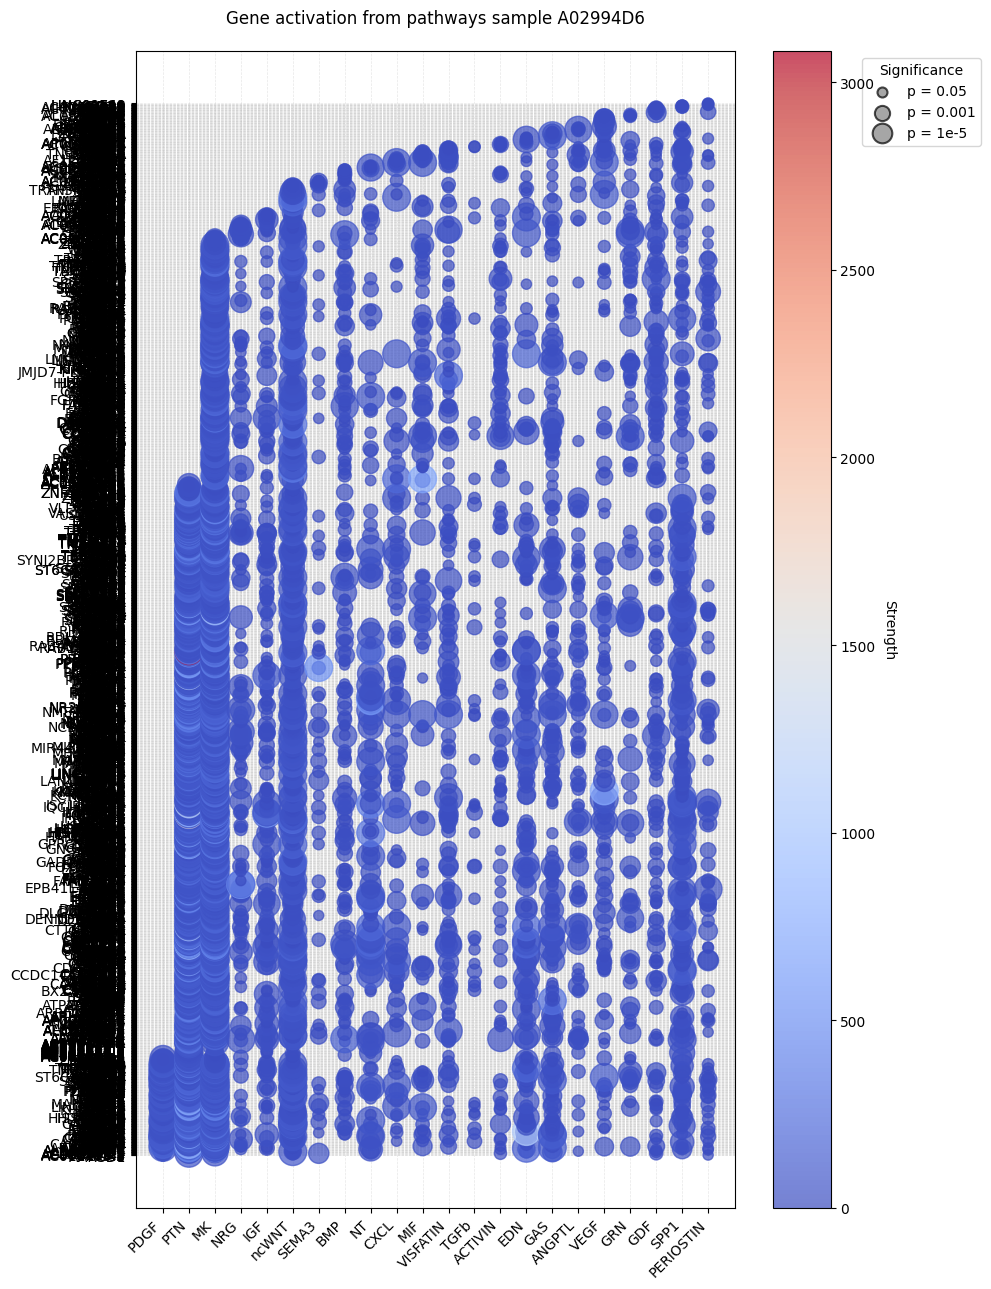

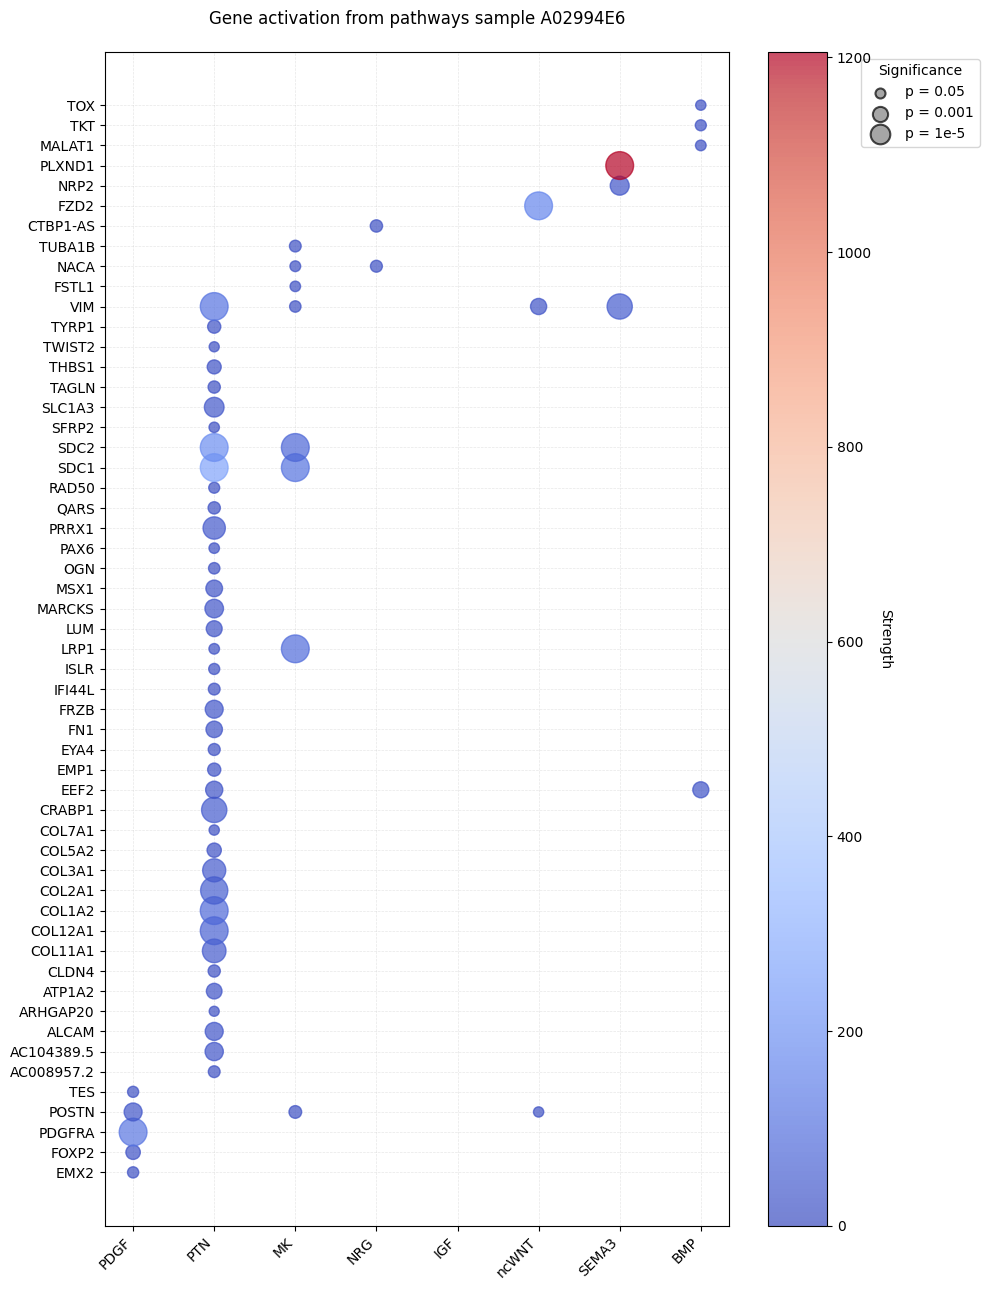

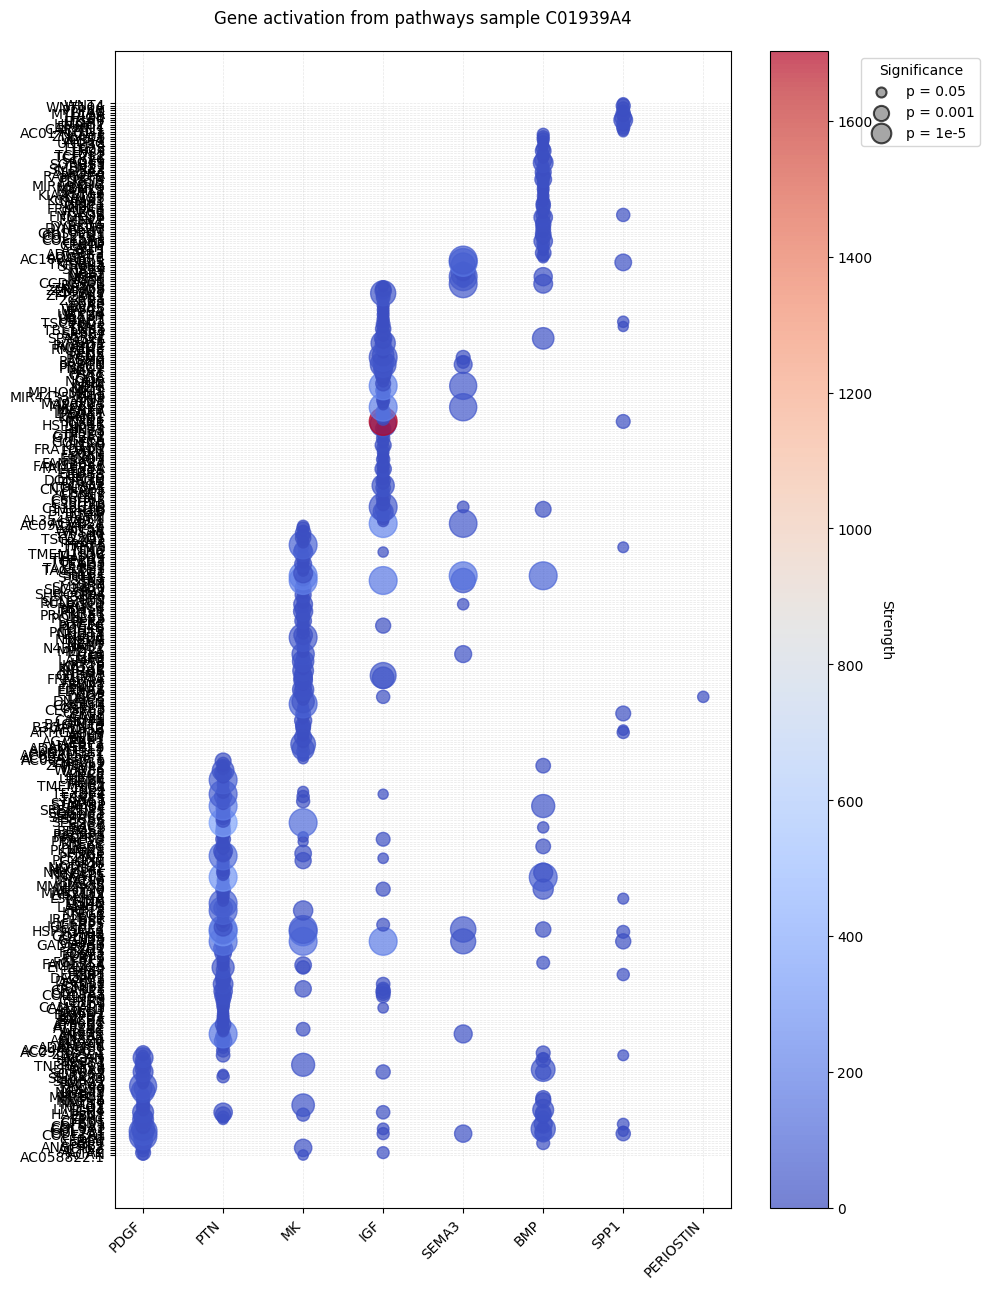

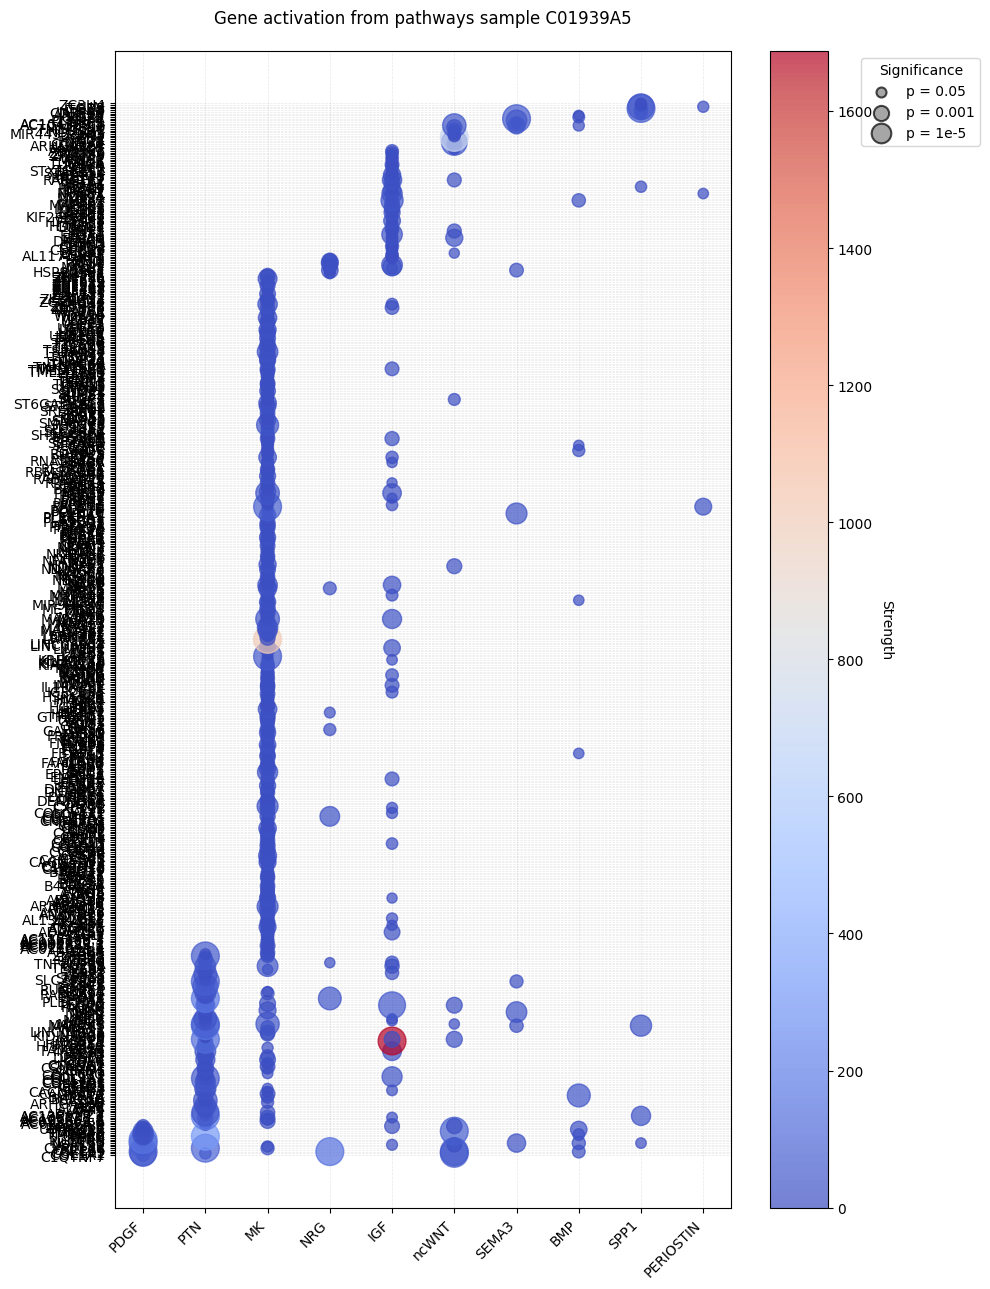

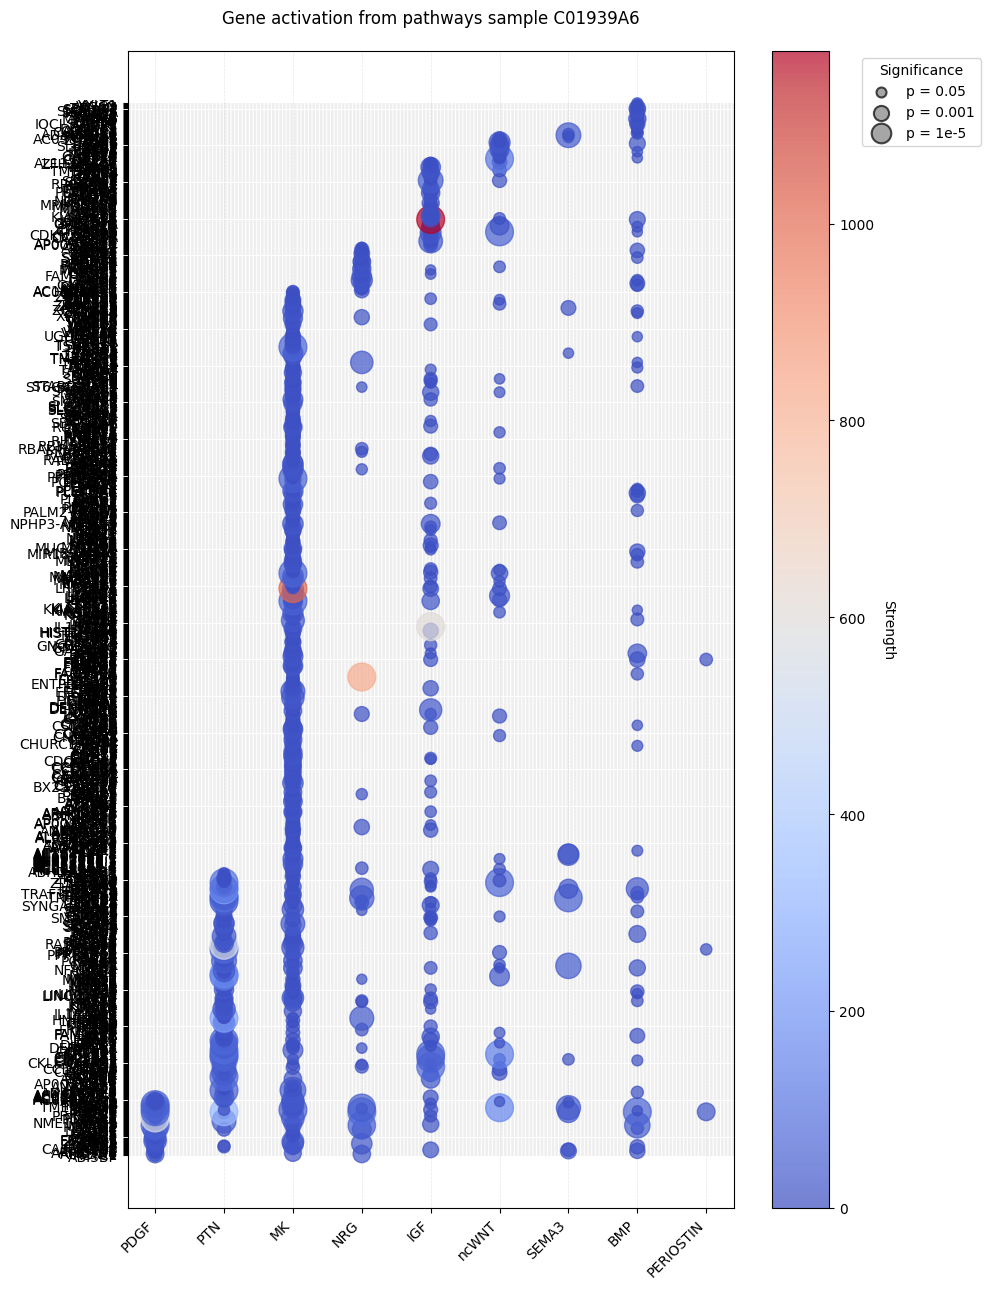

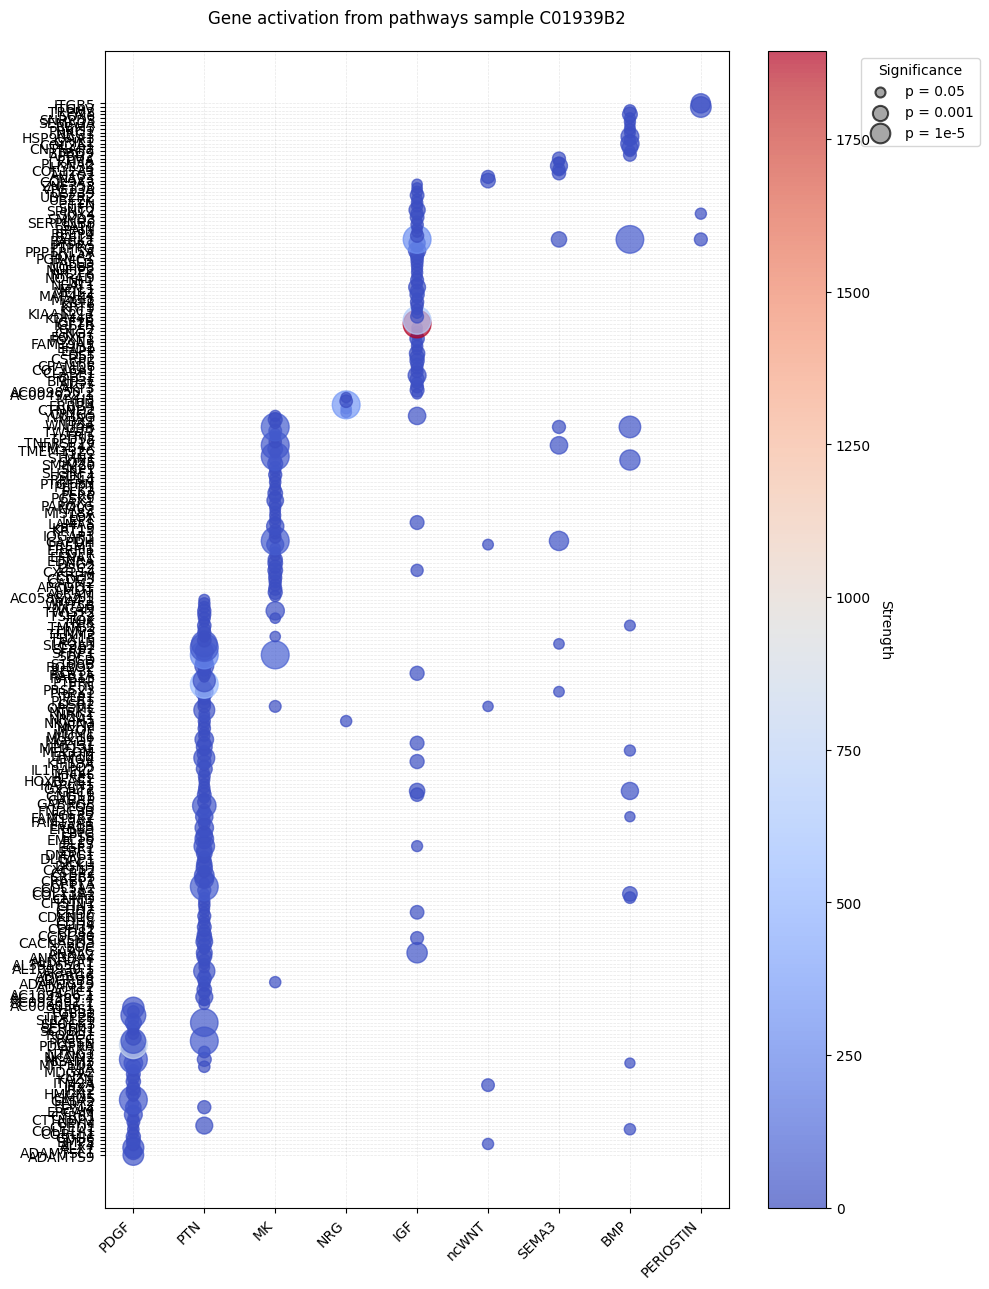

In [ ]:
if 'res_df' in locals():
    del res_df
    
for sample in samples:
    
    # This first part is to make it easier to get which downstream genes each sample should have.
    all_list = []
    #Finding out which ones are present in at least 2. 
    plot_path=f"/home/felix/projects/facial/felix/plots/reprocessed/pathway_and_signal_plots_{db}"
    for subdir in os.listdir(plot_path):
        with open(f"{plot_path}/{subdir}/{subdir[:8]}_all_pathways.txt") as f:
            txt = f.read().splitlines()
        all_list += txt

    res_dict= {}
    for x in all_list:
        if x in res_dict:
            res_dict[x]+=1
        else:
            res_dict[x]=1
    pathways=[x for x in res_dict if res_dict[x] != 1]
    
    print(sample)
    adata = sc.read_h5ad(f"{DATA_PATH}/annotated_stereo/{sample}_with_uncertain_50.h5ad")


    # Get CellChatDB
    import rpy2.robjects as robjects
    from rpy2.robjects import pandas2ri
    pandas2ri.activate()
    robjects.r['load']('/home/felix/data/CellChatDB/CellChatDB.human.rda')
    df = pandas2ri.rpy2py(robjects.r['CellChatDB.human'])
    obj = robjects.r["CellChatDB.human"]
    interaction = obj.rx2('interaction')
    complex_data = obj.rx2('complex')
    cofactor = obj.rx2('cofactor')
    geneInfo = obj.rx2('geneInfo')


    pval_thresh = 0.05  
    in_cells_thresh = 20
    dict_pathway_positive = {}
    dict_pathway_negative = {}
    for pathway in tqdm.tqdm(pathways[:]):

        # Check if file is in directory.
        if os.path.exists(f"{DATA_PATH}deg_{sample}_{db}/deg_{pathway}.pkl"):
            with open(f"{DATA_PATH}deg_{sample}_{db}/deg_{pathway}.pkl", 'rb') as file:
                deg_result = pickle.load(file)
            df_deg=deg_result["df_deg"]
            df_yhat=deg_result["df_yhat"]
            if str(type(df_yhat)) != "<class 'pandas.core.frame.DataFrame'>":
                print(f"    Skipping {pathway}")
                continue
            # Remove genes
            df_yhat=df_yhat[~df_yhat.index.str.startswith(("MT", "RPL", "HB", "RPS"))]
            # Seperate by postive and negative
            negative = []
            positive = []
            for gene in df_yhat.index.tolist()[:]:


                first = df_yhat.loc[gene][0]
                last = df_yhat.loc[gene][-1]
                if last < first:
                    negative.append(gene)
                else:
                    positive.append(gene)

            # For every positive/negative gene for this pathway
            # save the significance and strength
            tmp_dict_p = {}
            for p_gene in positive:
                tmp_dict = {}
                tmp_dict["significance"] = df_deg.pvalue[p_gene]
                tmp_dict["strength"] = df_deg.waldStat[p_gene]
                tmp_dict_p[p_gene] = tmp_dict
            tmp_dict_n = {}
            for n_gene in negative:
                tmp_dict = {}
                tmp_dict["significance"] = df_deg.pvalue[n_gene]
                tmp_dict["strength"] = df_deg.waldStat[n_gene]
                tmp_dict_n[n_gene] = tmp_dict

            dict_pathway_positive[pathway] = tmp_dict_p
            dict_pathway_negative[pathway] = tmp_dict_n

        else:
            # Print the gene that is missing from the ones all have
            # It is ok if they have 0 deg.
            print(pathway, sample)

    # Create dataframes
    p_df = pd.DataFrame(dict_pathway_positive)
    n_df = pd.DataFrame(dict_pathway_negative)

    # Plot positive
    df = dotplot_significance_and_strength(p_df,
                                           f"Gene activation from pathways sample {sample}",
                                           return_=True)
    print(f"Nr pathways: {len(df.Pathways.unique())}")
    
    # Only take genes with highest strength
    nr_top_genes=50
    df = df.sort_values("Strength", ascending=False)
    top_str_genes = []
    for index, row in df.iterrows():
        if len(top_str_genes) == nr_top_genes:
            break
        if row["genes"] not in top_str_genes:
            top_str_genes.append(row["genes"])
    df = df[df.genes.isin(top_str_genes)]

    df = cluster_df(df,"Pathways","genes","Strength")

    # Filter for CellchatDB interactions and recepotrs
    pathways = list(df.Pathways.unique())
    keep=[]
    for pathway in pathways:
        print(pathway)
        #print("To remove: ")
        receptors, interactions = get_db_info(pathway, interaction, cofactor)
        for index in df[df.Pathways==pathway].index:
            if df.loc[index].genes in receptors+interactions: # Remove recptors +interaction
                continue
            elif df.loc[index].genes == pathway: # Remove if it's self activating
                continue
            else:
                keep.append(index)
    df = df.loc[keep]

    # Cluster again
    df = cluster_df(df,"Pathways","genes","Strength")
    
    print(f"Nr pathways: {len(df.Pathways.unique())}")
    # For each pathway gene pair, see if it exists in the dictionary replace it if stronger
    if 'res_df' in locals():
        # Replace res_df rows with the ones from df which are better
        for index, row in df.iterrows():    
            if row["Pathways"] in res_df.Pathways.unique():
                sub_df = res_df[res_df.Pathways==row["Pathways"]]
                if row["genes"] in sub_df.genes.unique():
                    
                    sub_df = sub_df[sub_df.genes==row["genes"]]

                    # Replace with strength priority over Significance since all of the interactions should be significant
                    if sub_df.Strength.item() < row["Strength"]:
                        # Replace
                        res_df.loc[sub_df.index.item()] = row
                        print(f"    Old  Strength:{sub_df.Strength.item()}, Significance:{sub_df.Significance.item()}")
                        print(f"    New  Strength:{row['Strength']}, Significance:{row['Significance']}")
                        print(f"    Replaced {row['Pathways']}:{row['genes']}")
                    elif sub_df.Strength.item() == row["Strength"]:
                        if sub_df.Significance.item() > row["Significance"]:
                            # Replace
                            
                            res_df.loc[sub_df.index.item()] = row
                            print(f"    Old  Strength:{sub_df.Strength.item()}, Significance:{sub_df.Significance.item()}")
                            print(f"    New  Strength:{row['Strength']}, Significance:{row['Significance']}")
                            print(f"    Replaced {row['Pathways']}:{row['genes']}")
                else:
                    # If it is a new pathway-gene interaction
                    # Add the row to the end
                    res_df = pd.concat([res_df, row.to_frame().T], ignore_index=True)

            else:
                # If it is a new pathway
                # Add the row to the end
                res_df = pd.concat([res_df, row.to_frame().T], ignore_index=True)

                
                            
                
    else:
        res_df = df
    res_df = res_df.sort_index()
        
    
    

In [10]:
# Fill in missing, might be unneccessary
genes = list(res_df.genes.unique())
for pathway in res_df.Pathways.unique():
    sub_df = res_df[res_df.Pathways == pathway]
    for gene in genes:
        if gene in list(sub_df.genes.unique()):
            continue
        else:
            # Add
            new_row = pd.Series({'Pathways': pathway, 'genes': gene, 'Significance':1, "Strength":0 , "Significance_capped": 1})
            res_df = pd.concat([res_df, new_row.to_frame().T], ignore_index=True)
            res_df = res_df.sort_index()

In [11]:
for pathway in res_df.Pathways.unique():
    print(f"{pathway} {len(res_df[res_df.Pathways==pathway])}")


PDGF 240
PTN 240
MK 240
NRG 240
IGF 240
SEMA3 240
ncWNT 240
SPP1 240
VISFATIN 240
TGFb 240
EDN 240
NT 240
BMP 240
CXCL 240
MIF 240
GAS 240
ANGPTL 240
ACTIVIN 240
VEGF 240
PERIOSTIN 240
GDF 240


In [12]:
# Cluster again
res_df = cluster_df(res_df,"Pathways","genes","Strength")

In [13]:
for pathway in res_df.Pathways.unique():
    print(f"{pathway} {len(res_df[res_df.Pathways==pathway])}")


MK 104
ncWNT 33
PDGF 49
SEMA3 46
BMP 30
NRG 26
PTN 161
SPP1 39
IGF 60
NT 16
CXCL 10
VEGF 2
VISFATIN 10
TGFb 9
ANGPTL 8
EDN 21
PERIOSTIN 6
GAS 10
ACTIVIN 1
GDF 5
MIF 1


In [14]:
# Check for missing values
print(res_df['Significance_capped'].isna().sum())
res_df['Significance_capped'] = res_df['Significance_capped'].fillna(1.0)  # p-value of 1 means no significance



0


In [89]:
def dotplot_significance_and_strength_from_df(df, title, save_as):
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 0.06*df.shape[0]))

    scale = 20

    scatter = ax.scatter(df['Pathways'], df['genes'], 
                         s=-np.log10(df['Significance_capped']) * scale,  
                         c=df["Strength"],
                         cmap='coolwarm',
                         zorder=3.,
                         linewidth=1,
                         edgecolors="black"
                        )

    ax.set_ylim(-0.5, len(df['genes'].unique()) - 0.5)

    # Add gridlines
    ax.grid(True,
            linestyle='-',
            linewidth=1,
            zorder=1)
    ax.set_axisbelow(True)  # Put grid behind the dots

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label(f"Strength", rotation=270, labelpad=15)

    # Customize the plot
    plt.title(title, pad=20)
    plt.xticks(rotation=45, ha='right')

    # Add legend
    legend_sizes = [0.05, 0.001, 0.00001]
    #legend_sizes = [max(significances), 0.05, min(significances)]


    legend_points = []
    for sig in legend_sizes:
        size = -np.log10(sig) * scale  # Use same scale as actual plot
        legend_points.append(ax.scatter([], [], s=size, c='gray', alpha=0.7, 
                                        edgecolors='black', linewidth=1))
    legend_labels = ['p = 0.05', 'p = 0.001', 'p = 1e-5']
    ax.legend(legend_points, legend_labels, 
              scatterpoints=1, 
              title='Significance', 
              frameon=True,
              loc='upper left',
              bbox_to_anchor=(1.25, 1),
              fontsize=10)

    ax.margins(y=0.2)  # Small margin instead of default

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    #plt.show()
    if bool(save_as):
        plt.savefig(save_as)

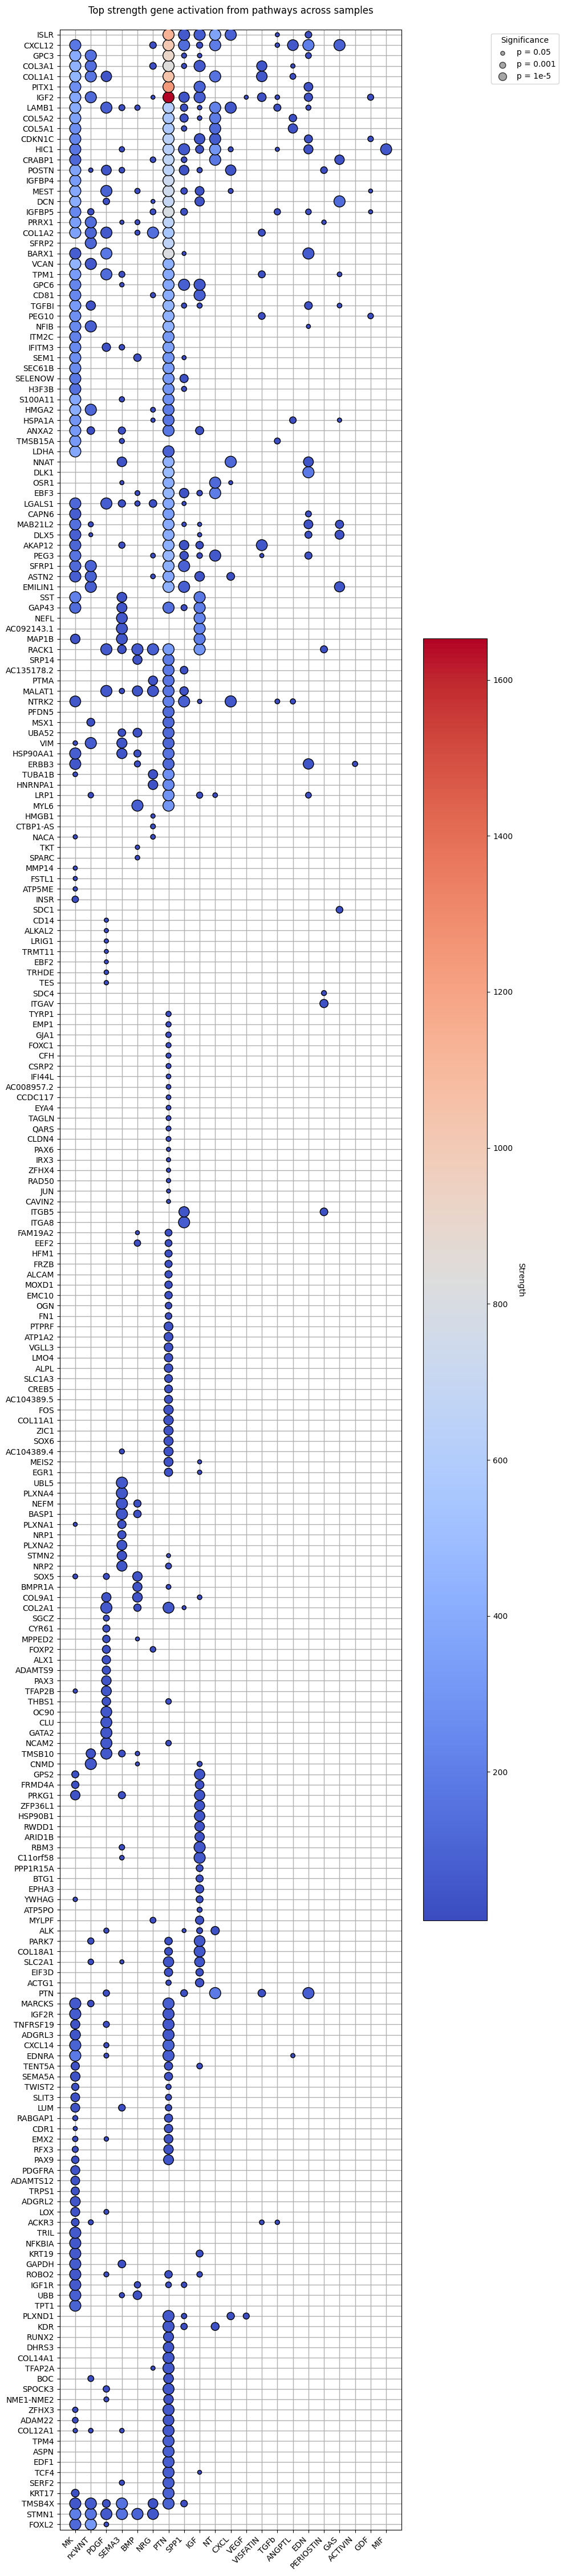

In [35]:
# Plot with the df plot version 
dotplot_significance_and_strength_from_df(res_df, 
                                          f"Top strength gene activation from pathways across samples",
                                          f"plots/global_top_gene_activation_from_pathways.svg"
                                         )

In [36]:
len(res_df.genes.unique())

240

### Filter on spatial genes

In [69]:
unique_spatial = []
for sample in samples:
    print(sample)
    spatial_genes = pd.read_csv(f"/home/felix/projects/facial/felix/spatial_signature_genes/{sample}_20_genes/ranked_list.tsv", sep="\t")
    unique_spatial = unique_spatial + spatial_genes["Unnamed: 0"].unique().tolist()
unique_spatial = list(set(unique_spatial))

A02993E1
A02989E1
A02994D6
A02994E6
C01939A4
C01939A5
C01939A6
C01939B2


In [71]:
not_drop_ = [ x for x in res_df.genes.unique() if x not in unique_spatial]

In [72]:
len(not_drop_)

146

In [73]:
no_spatial = res_df[res_df.genes.isin(not_drop_)]

In [80]:
len(res_df.genes.unique())

240

In [74]:
len(no_spatial.genes.unique())

146

In [75]:
# Cluster again
no_spatial = cluster_df(no_spatial,"Pathways","genes","Strength")

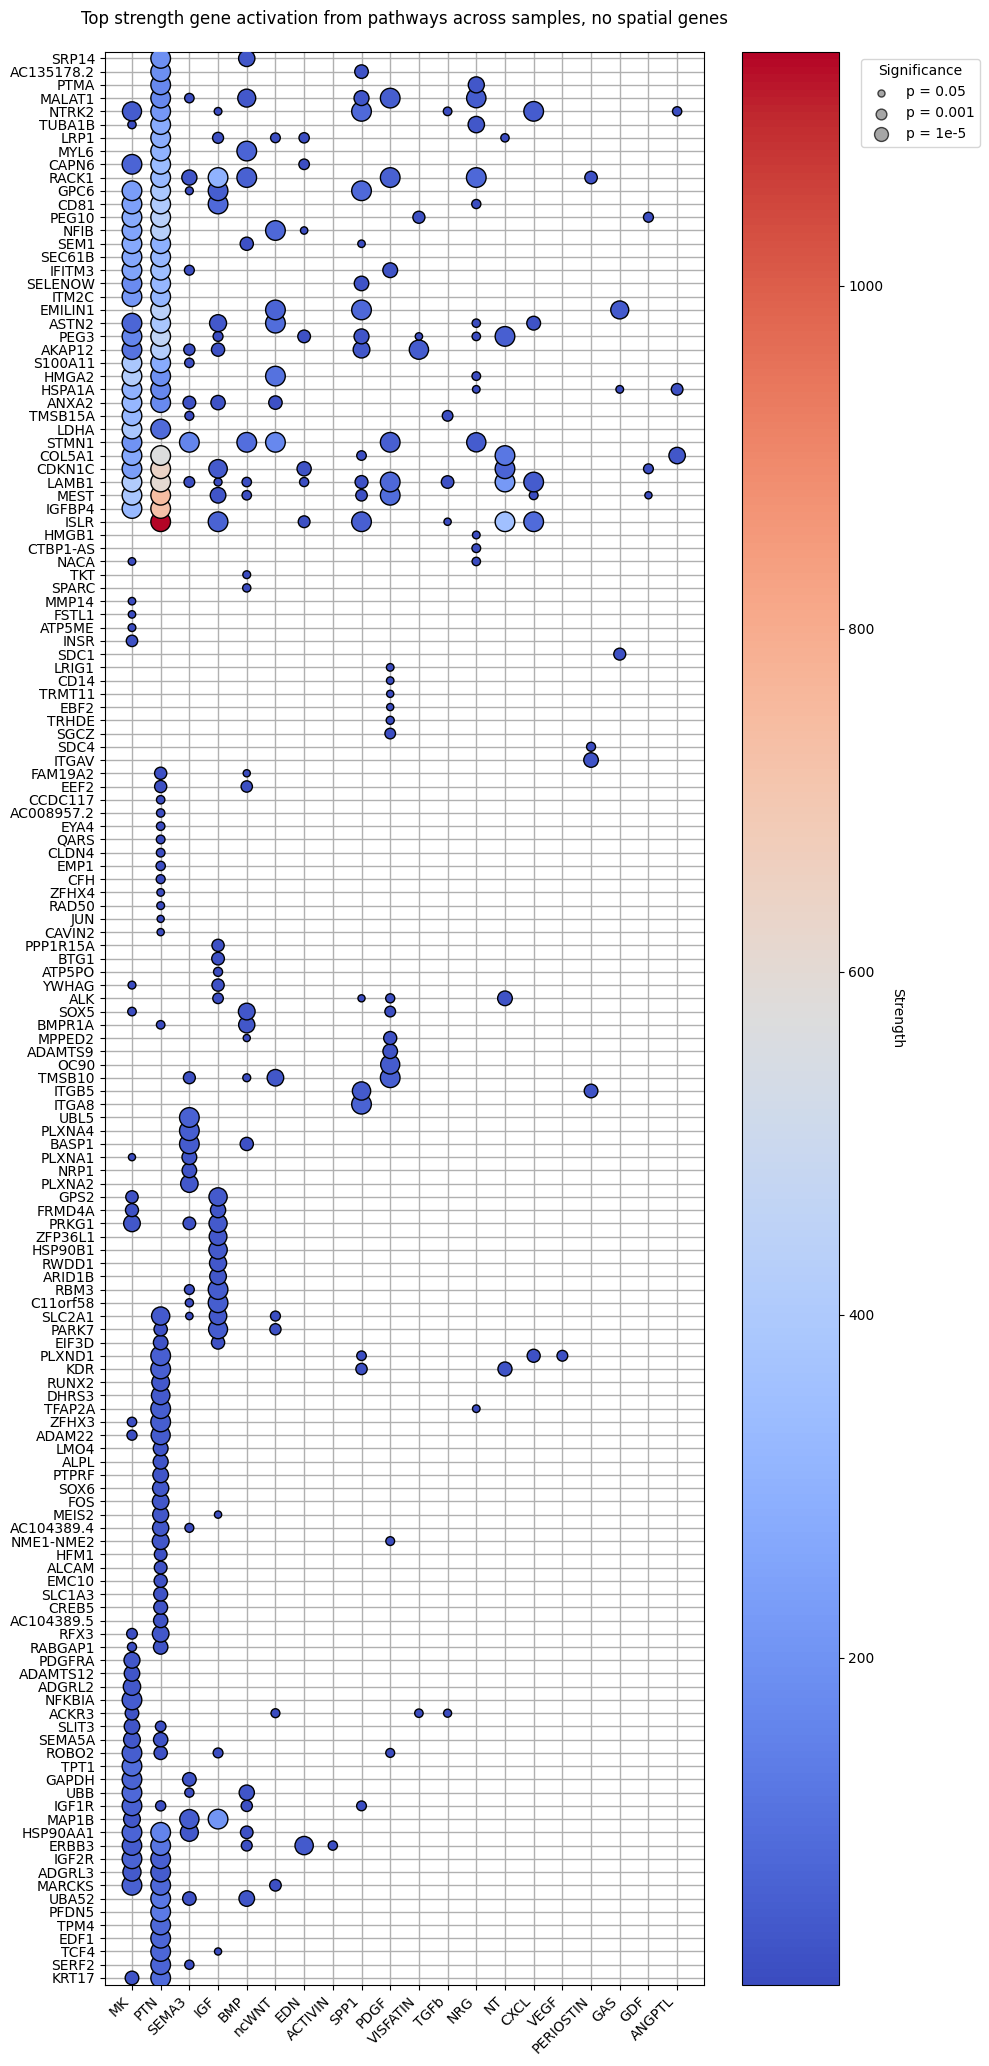

In [90]:
# Plot with the df plot version 
dotplot_significance_and_strength_from_df(no_spatial, 
                                          f"Top strength gene activation from pathways across samples, no spatial genes",
                                          f"plots/global_top_gene_activation_from_pathways_filtered_spatial_genes.svg"
                                         )

In [91]:
drop_ = [ x for x in res_df.genes.unique() if x in unique_spatial]


In [92]:
len(drop_)

94

In [93]:
spatial = res_df[res_df.genes.isin(drop_)]

In [94]:
len(spatial.genes.unique())

94

In [95]:
# Cluster again
spatial = cluster_df(spatial,"Pathways","genes","Strength")

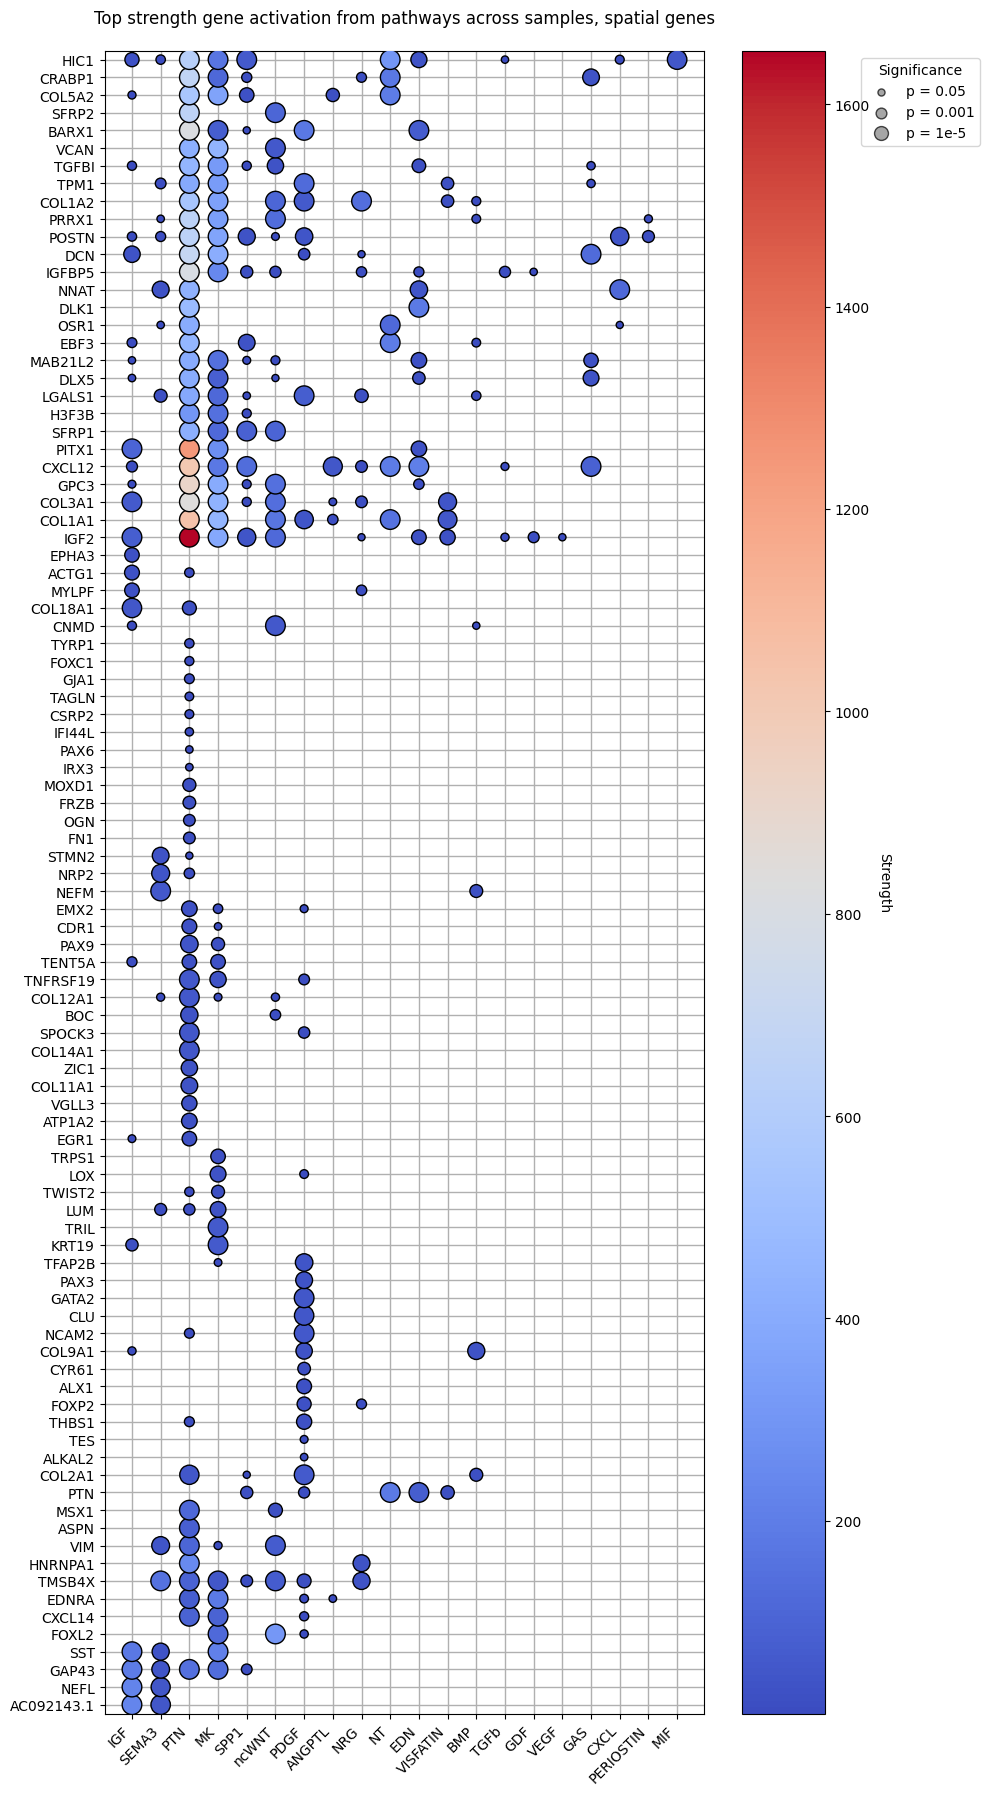

In [96]:
# Plot with the df plot version 
dotplot_significance_and_strength_from_df(spatial, 
                                          f"Top strength gene activation from pathways across samples, spatial genes",
                                          f"plots/global_top_gene_activation_from_pathways_spatial_genes.svg"
                                         )